In [1]:
from scripts.navigation_smart import *

In [ ]:
navigation = Indoor_Navigation('assets/images/floor_plan_1.jpg',
                                'Simple Floor Plan',
                                debug=False)
navigation.calibrate(1)
navigation.process_image(grid_size=110)

In [ ]:
navigation = Indoor_Navigation('assets/images/PC_lab.png',
                                'PC Lab Floor Plan',
                                debug=False)
navigation.process_image(grid_size=150)

In [ ]:
navigation = Indoor_Navigation('assets/images/PC_lab-isogeio.png',
                                'Fancy Hospital',
                                debug=False)
navigation.calibrate(0.00148)
navigation.process_image(grid_size=100)

In [2]:
navigation = Indoor_Navigation('assets/images/hospital_1_cleaned.jpg',
                                'Fancy Hospital',
                                debug=False)
navigation.calibrate(0.00148)
navigation.process_image(grid_size=30)

Overall Progress:  29%|██▊       | 2/7 [00:00<00:00,  6.68task/s]

Initial image process...
Detecting walls...
Detecting doors...


Overall Progress:  43%|████▎     | 3/7 [00:04<00:06,  1.70s/task]

Creating Contours...


Overall Progress:  57%|█████▋    | 4/7 [00:04<00:03,  1.19s/task]

Placing graph nodes...


Overall Progress:  71%|███████▏  | 5/7 [00:05<00:01,  1.02task/s]

Connecting graph edges...


Overall Progress:  86%|████████▌ | 6/7 [04:54<01:33, 93.48s/task]

Creating smart graph...


Overall Progress: 100%|██████████| 7/7 [04:59<00:00, 42.77s/task]


In [6]:
navigation = Indoor_Navigation.load('navigation-instances/admin_ui_test.pkl')
# navigation.get_json(save_path='test.json')

In [5]:
# navigation.save('navigation-instances/hospital_1.pkl')
navigation = Indoor_Navigation.load('navigation-instances/hospital_1.pkl')

In [ ]:
# plot graph
image = navigation.walls.copy()
graph = navigation.graph

# image to rgb
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# draw edges
for i, j in graph.edges:
    cv2.line(image, navigation.graph_nodes[i], navigation.graph_nodes[j], (255, 0, 0), 2)
# draw nodes
for node in navigation.graph_nodes:
    cv2.circle(image, node, 7, (0, 0, 255), -1)

plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

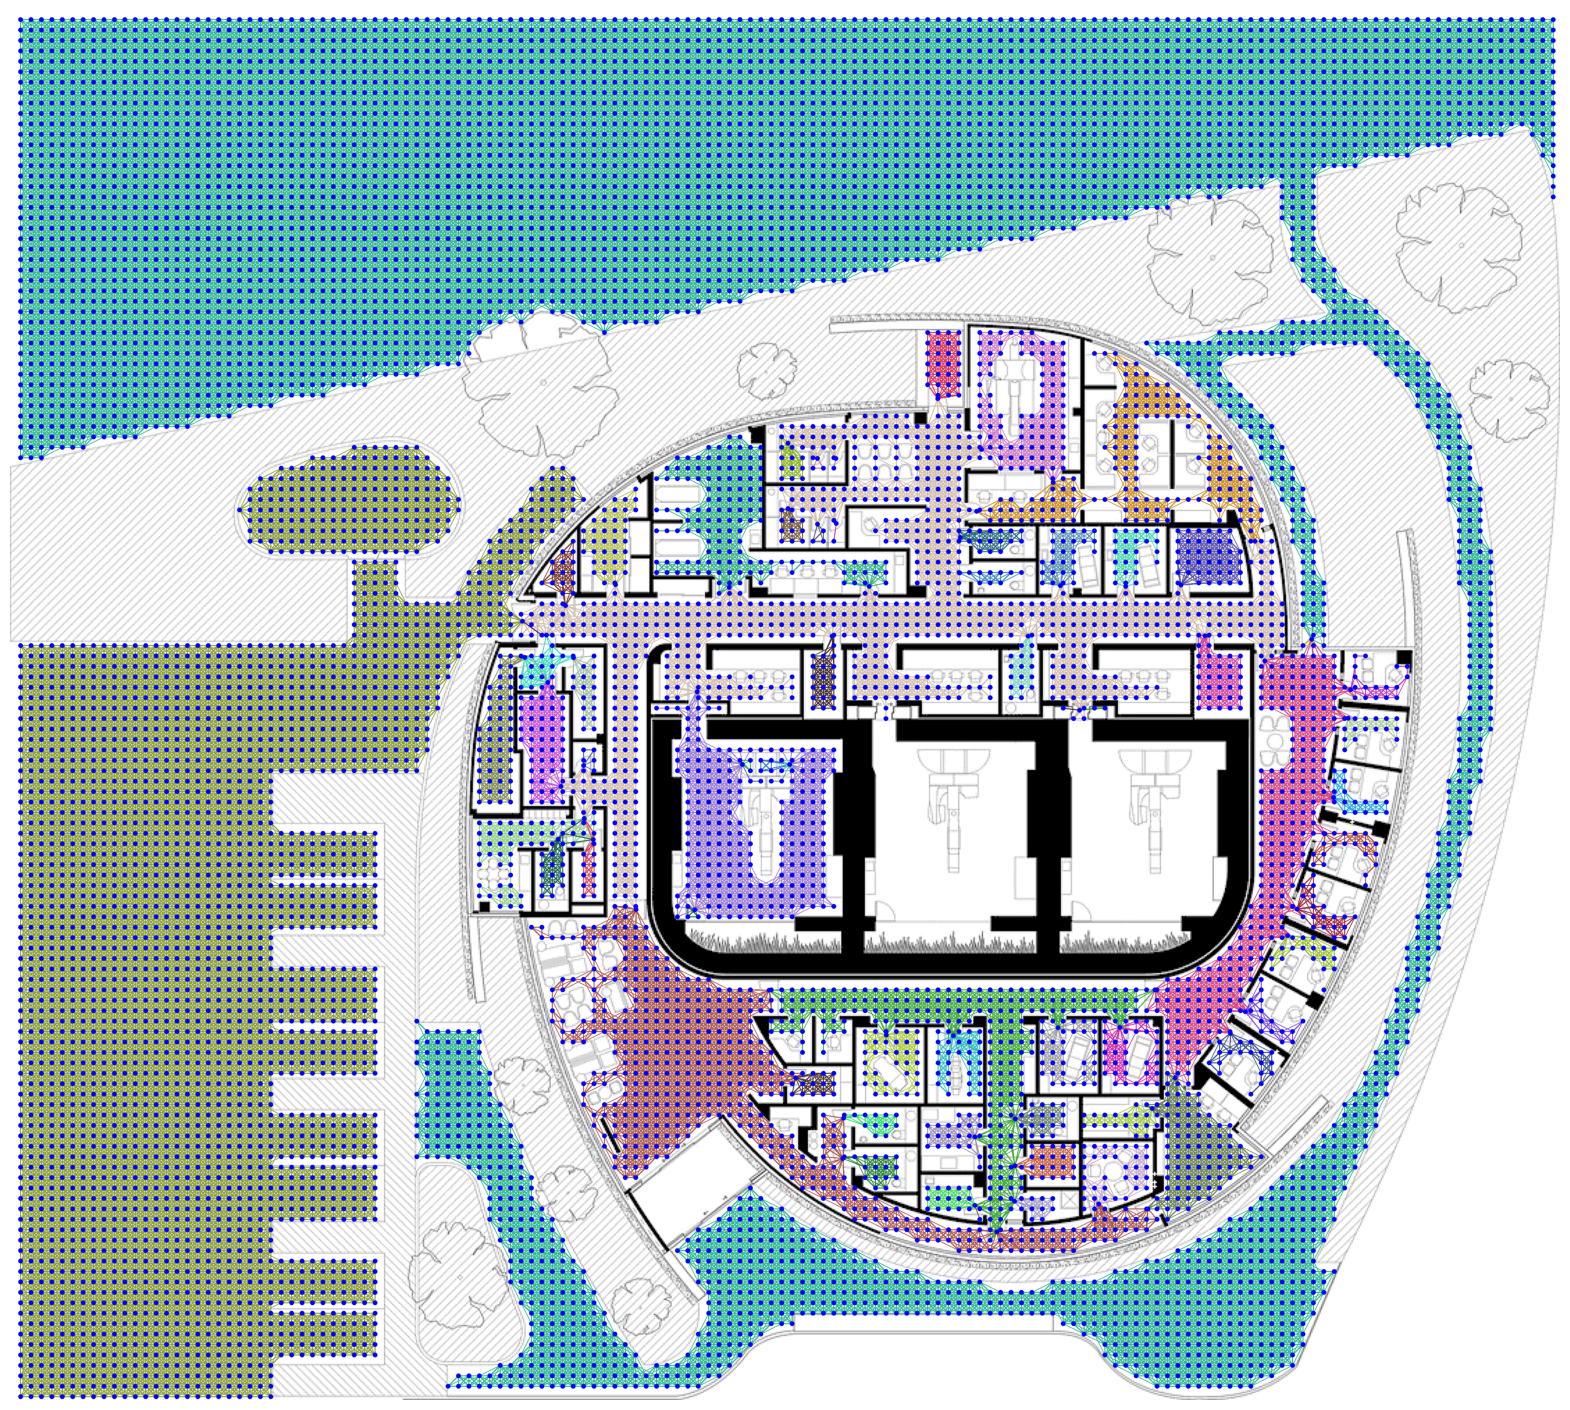

In [4]:
navigation.graph.plot_graph(navigation.image_upscale)

In [69]:
# Measure time
import time
start = time.time()
_ = navigation.calculate_route(start=(0.6, 0.3),
                                end=(0.4, 0.8),
                                algorithm='dijkstra',
                                in_pixels=False,
                                simplify_route=True)
# print time in ms
print(f'Path calculation time: {(time.time() - start) * 1000}ms')

Path calculation time: 7.056713104248047ms


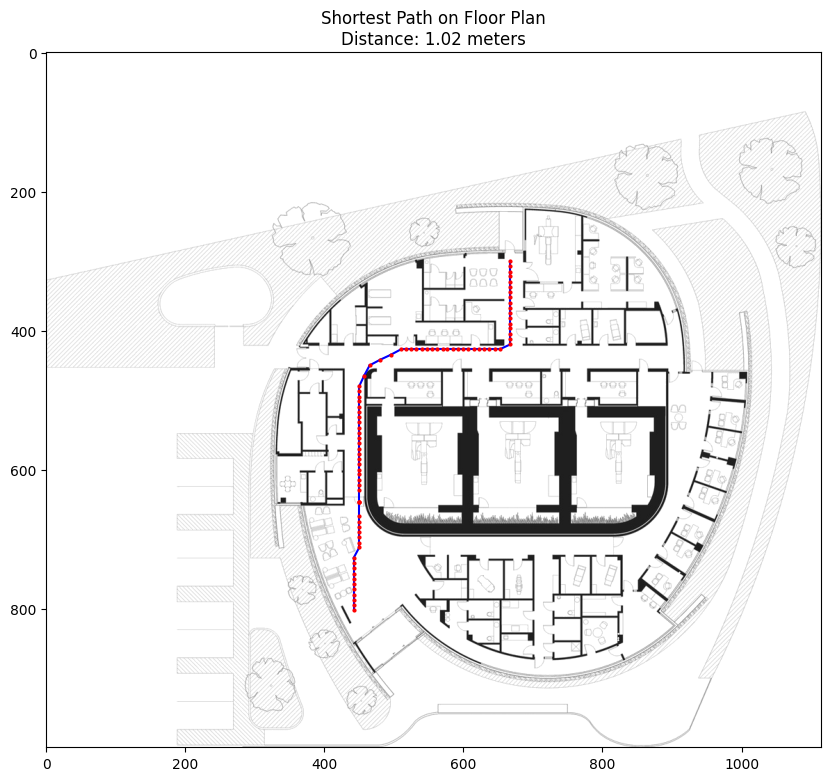

In [51]:
plt.figure(figsize=(10, 10))
navigation.calculate_and_plot_route(start=(0.6, 0.3),
                                    end=(0.4, 0.8),
                                    algorithm='astar',
                                    in_pixels=False,
                                    simplify_route=True)

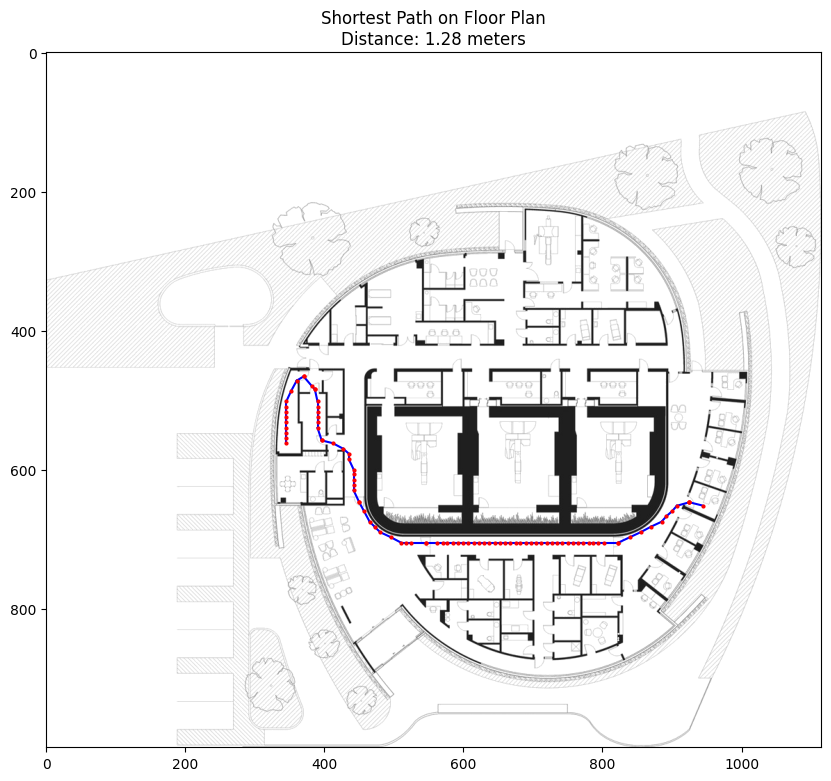

In [26]:
plt.figure(figsize=(10, 10))
navigation.calculate_and_plot_route(start=(0.31, 0.56),
                                    end=(0.85, 0.65),
                                    algorithm='astar',
                                    in_pixels=False,
                                    simplify_route=True)

Number of rooms: 60


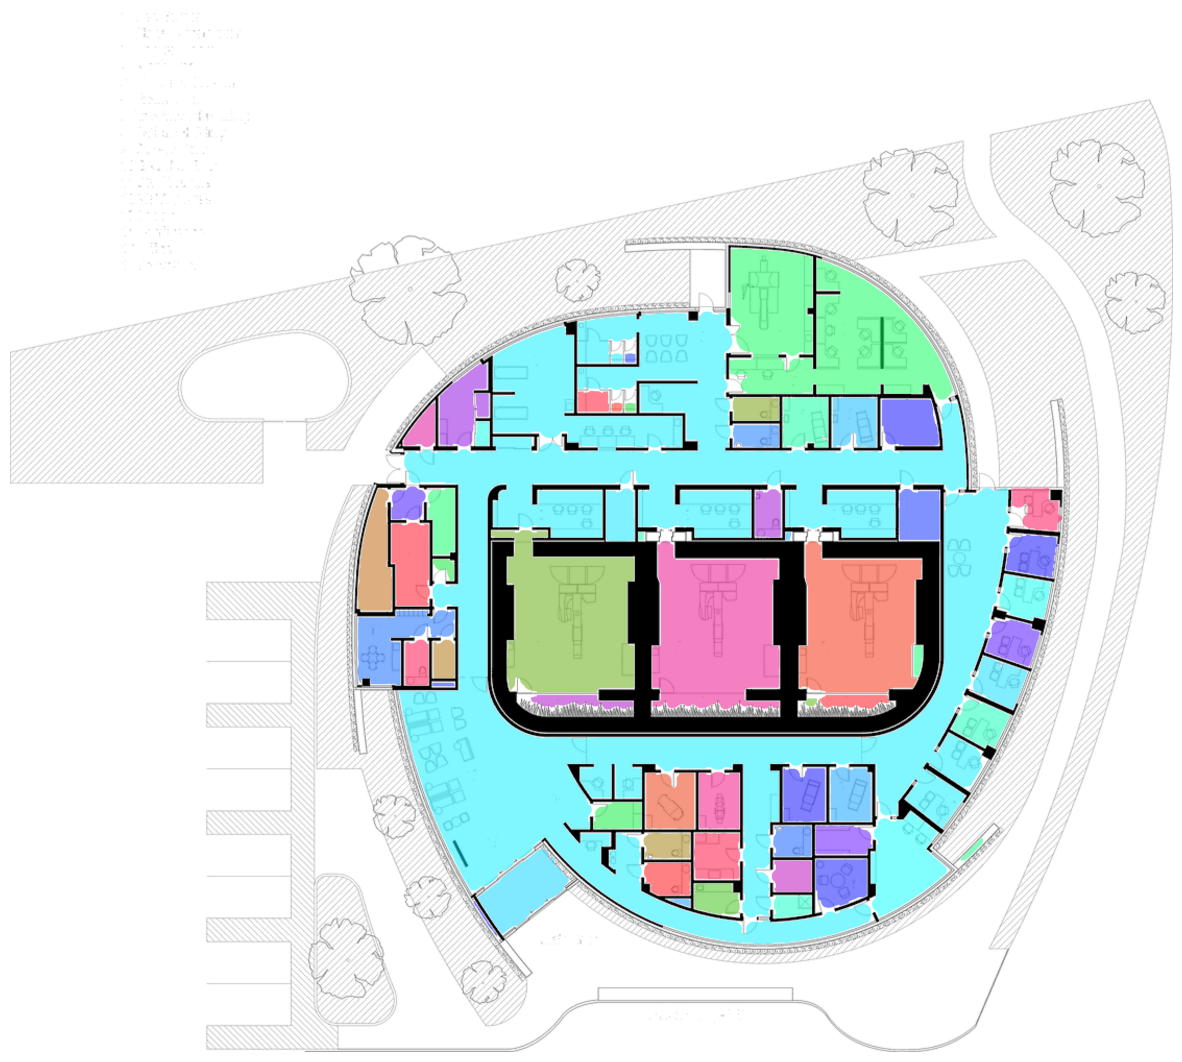

In [3]:
navigation.plot_image(navigation.image_upscale, with_rooms=True)

Number of rooms: 60


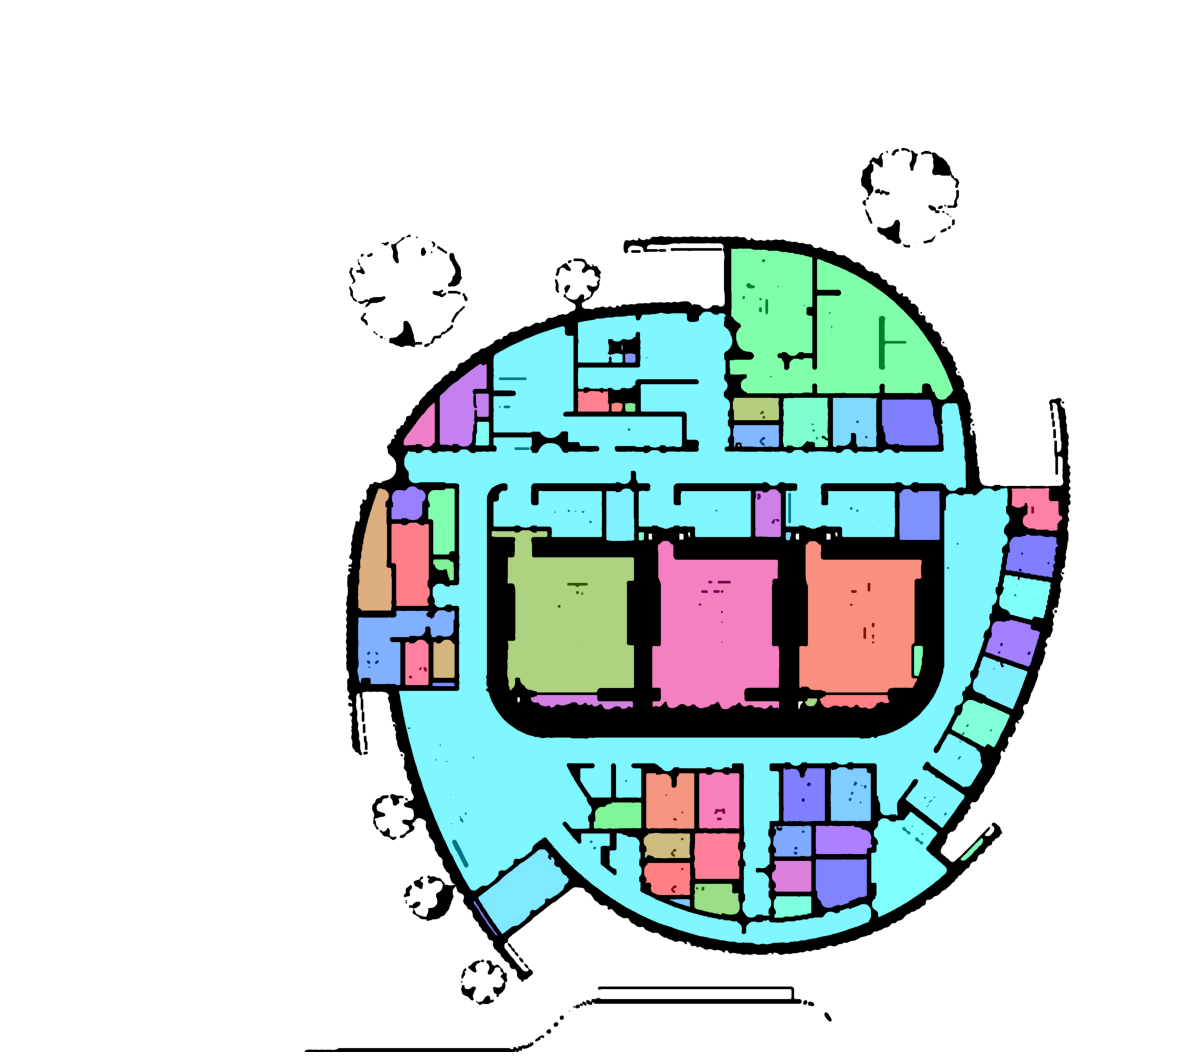

In [4]:
navigation.plot_image(navigation.walls_doors, with_rooms=True)

In [4]:
# navigation.plot_image(navigation.image_upscale,
#                       with_rooms=True,
#                       save_file='assets/images/hospital_1_rooms.jpg'
#                       )

In [5]:
# navigation.plot_image(navigation.image_upscale,
#                       with_rooms=False,
#                       save_file='assets/images/hospital_1_upscaled_sharpened.jpg'
#                       )